<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>




<h1 style="color: green;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
CIFAR 10 Object Recognition in Images
</h1>


| <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7-VNaEQEsTAc2r_DnrPjBRcTCec_rmXjEsQ&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeLDhtEVF5v3P76vbN9xYxD4ZwnVXuIgN4ow&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRWhGpXWfS5xFLOzzqr8cqkIB2tMXXZ48CWA&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7eLyTg7mTPuwBVCfF2Xy224bPCBmfajHwwQ&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> |
|---|---|---|---|


### Author: `Ali Hassan`

**[CIFAR 10 Dataset](https://www.kaggle.com/competitions/cifar-10/data)**\
Dataset Description
The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

train.7z - a folder containing the training images in png format
test.7z - a folder containing the test images in png format
trainLabels.csv - the training labels

To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

The label classes in the dataset are:

**airplane\
automobile \
bird \
cat \
deer \
dog \
frog \
horse \
ship \
truck**

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

<h3 style="color: brown;font-family: 'Times New Roman', Times, serif; font-weight: bold;">Import Libraries</h3>

In [ ]:
import os
import py7zr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import matplotlib.pyplot as plt

<h3 style="color: brown;font-family: 'Times New Roman', Times, serif; font-weight: bold;">
Download the Dataset
</h3>

In [ ]:
# daatset api
# !kaggle competitions download -c cifar-10


  0%|          | 0.00/715M [00:00<?, ?B/s]
 14%|█▍        | 103M/715M [00:00<00:00, 1.07GB/s]
 30%|██▉       | 213M/715M [00:00<00:00, 1.11GB/s]
 46%|████▌     | 329M/715M [00:00<00:00, 1.16GB/s]
 62%|██████▏   | 440M/715M [00:00<00:00, 1.11GB/s]
 76%|███████▋  | 547M/715M [00:00<00:00, 1.06GB/s]
 91%|█████████ | 649M/715M [00:00<00:00, 646MB/s] 
100%|██████████| 715M/715M [00:00<00:00, 831MB/s]


<h3 style="color: brown;font-family: 'Times New Roman', Times, serif; font-weight: bold;">
Extracting the data from zip
</h3>

In [ ]:
import zipfile

with zipfile.ZipFile("cifar-10.zip", 'r') as zip_ref:
    zip_ref.extractall("cifar10_data")

print(" Dataset extracted to 'cifar10_data/'")


✅ Dataset extracted to 'cifar10_data/'


<h3 style="color: brown;font-family: 'Times New Roman', Times, serif; font-weight: bold;">
Download 7zip Library to extract
</h3>

In [ ]:
# !pip install py7zr 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ---------------------------------- ----- 1.6/1.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.8 MB/s eta 0:00:00

   ---------------------------------------- 0/9 [texttable]
   -------- ------------------------------- 2/9 [pyzstd]
   ------------- -------------------------- 3/9 [pyppmd]
   ----------------- ---------------------- 4/9 [pycryptodomex]
   ----------------- ---------------------- 4/9 [pycryptodomex]
   ----------------- ---------------------- 4/9 [pycryptodomex]
   ----------------- ---------------------- 4/9 [pycryptodomex]
   ----------------- ---------------------- 4/9 [pycryptodomex]
   ----------------- ---------------------- 4/9 [pycryptodomex]
   ----------------- ---------------------- 4/9 [pycryptodomex]
   -----------

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Defining all the paths
</h3>

In [ ]:
# Defining the Paths
base_dir = "cifar10_data"
train_7z = os.path.join(base_dir, "train.7z")
test_7z = os.path.join(base_dir, "test.7z")
train_labels_csv = os.path.join(base_dir, "trainLabels.csv")
train_dir = os.path.join(base_dir, "train/train")
test_dir = os.path.join(base_dir, "test")

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Extracting the data from files
</h3>

In [ ]:
#  Extracting if not already extracted 
def extract_7z(file_path, extract_to):
    if not os.path.exists(extract_to):
        print(f"Extracting {file_path}...")
        with py7zr.SevenZipFile(file_path, mode='r') as archive:
            archive.extractall(path=extract_to)
    else:
        print(f"{extract_to} already exists, skipping extraction.")

extract_7z(train_7z, train_dir)
extract_7z(test_7z, test_dir)

Extracting cifar10_data\train.7z...
Extracting cifar10_data\test.7z...


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Loading the train Labels
</h3>
<div class="container" style="color: rgb(212, 123, 13);font-family: 'Franklin Gothic Medium'">
    <li>frog</li>
    <li>truck</li>
    <li>deer</li>
    <li>automobile</li>
    <li>bird</li>
    <li>horse</li>
    <li>ship</li>
    <li>cat</li>
    <li>dog</li>
    <li>airplane</li>
</div>

In [56]:
# Load train labels
df_labels = pd.read_csv(train_labels_csv)
print("Sample of labels:\n", df_labels.head())
# All unique labels
unique_labels = df_labels['label'].unique()
print("Unique labels:", unique_labels)

# Count of unique labels
print("Number of unique classes:", df_labels['label'].nunique())

Sample of labels:
    id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
Unique labels: ['frog' 'truck' 'deer' 'automobile' 'bird' 'horse' 'ship' 'cat' 'dog'
 'airplane']
Number of unique classes: 10


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Displaying the Sample 16 Images
</h3>

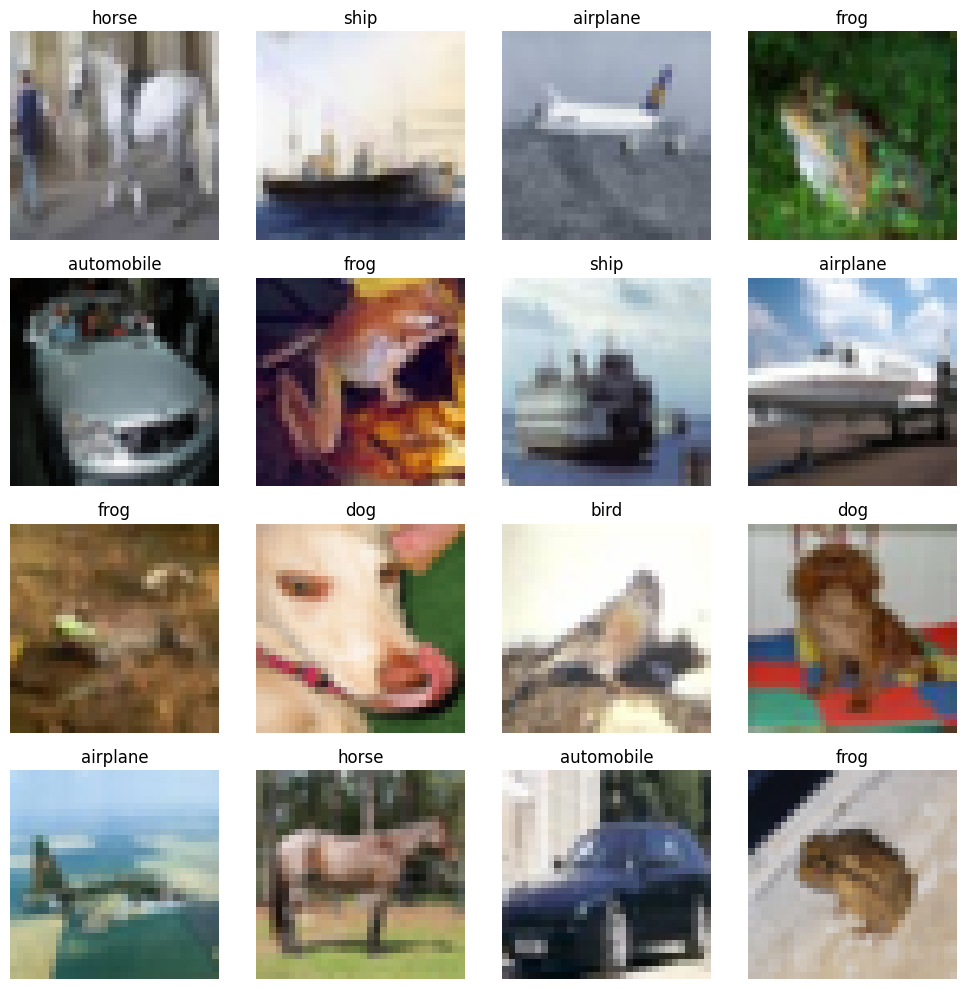

In [ ]:
# Displaying the Sample 16 Images
sample_rows = df_labels.sample(16, random_state=42)

# Create figure
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i, (_, row) in enumerate(sample_rows.iterrows()):
    img_name = f"{row['id']}.png"
    img_path = os.path.join(train_dir, img_name)
    
    # Load and normalize image
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    
    # Show image
    axes[i].imshow(img_array)
    axes[i].set_title(row['label'])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Loading Images + Preprocessing
</h3>

In [ ]:
# Load images + preprocess
IMG_SIZE = (32, 32)  # CIFAR-10 is originally 32x32
X, y = [], []

for _, row in df_labels.iterrows():
    img_name = f"{row['id']}.png"
    img_path = os.path.join(train_dir, img_name)
    
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0  # normalize to [0,1]
    
    X.append(img_array)
    y.append(row['label'])

X = np.array(X, dtype=np.float32)
y = np.array(y)

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Encoding the Labels to Numbers
</h3>

In [ ]:
# Encode labels to numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

In [22]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"y_onehot shape: {y_onehot.shape}")

X shape: (50000, 32, 32, 3)
y shape: (50000,)
y_onehot shape: (50000, 10)


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Splitting the train and validation
</h3>

In [ ]:
# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y_onehot
)

In [12]:
print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}")
print(f"Classes: {label_encoder.classes_}")

Train shape: (40000, 32, 32, 3), Val shape: (10000, 32, 32, 3)
Classes: ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Data Augmentation
</h3>

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator()  # no augmentation for validation

train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64)

<h1 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Building the Model ------------------- ResNet-Style Block
</h1>

In [ ]:
# Define ResNet-style block
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,Input, Activation,GlobalAveragePooling2D, Add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
def resnet_block(x, filters, kernel_size=3):
    shortcut = x
    x = Conv2D(filters, kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

In [ ]:
# Build ResNet-like model 
inputs = Input(shape=(32,32,3))
x = Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)

# 3 ResNet blocks
x = resnet_block(x, 32)
x = resnet_block(x, 32)
x = Conv2D(64, (3,3), strides=2, padding='same', activation='relu')(x)  # downsample
x = BatchNormalization()(x)
x = resnet_block(x, 64)
x = resnet_block(x, 64)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(len(label_encoder.classes_), activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Using Callbacks Function
</h3>

In [ ]:
# Using Callbacks Function 
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint('best_cifar10_resnet.h5', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
]

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Train the Model
</h3>

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
625/625 [==============================] - 30s 44ms/step - loss: 1.7604 - accuracy: 0.3501 - val_loss: 1.9288 - val_accuracy: 0.3883 - lr: 0.0010
Epoch 2/50
625/625 [==============================] - 28s 44ms/step - loss: 1.3739 - accuracy: 0.4999 - val_loss: 1.7812 - val_accuracy: 0.4262 - lr: 0.0010
Epoch 3/50
625/625 [==============================] - 28s 45ms/step - loss: 1.2077 - accuracy: 0.5715 - val_loss: 1.1970 - val_accuracy: 0.5620 - lr: 0.0010
Epoch 4/50
625/625 [==============================] - 27s 43ms/step - loss: 1.1085 - accuracy: 0.6089 - val_loss: 1.2537 - val_accuracy: 0.5754 - lr: 0.0010
Epoch 5/50
625/625 [==============================] - 27s 43ms/step - loss: 1.0381 - accuracy: 0.6378 - val_loss: 1.2930 - val_accuracy: 0.5493 - lr: 0.0010
Epoch 6/50
625/625 [==============================] - 28s 45ms/step - loss: 0.9791 - accuracy: 0.6593 - val_loss: 0.9127 - val_accuracy: 0.6865 - lr: 0.0010
Epoch 7/50
625/625 [==============================] - 27s 

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Saving the Model
</h3>

In [ ]:
# Save the  model
model.save("cifar10_resnet_model.h5")
print("Model saved successfully!")


Model saved successfully!


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Loading the Model
</h3>

In [45]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("cifar10_resnet_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [46]:
# Evaluate model on validation data
val_loss, val_accuracy = loaded_model.evaluate(X_val, y_val, verbose=0)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

Validation Loss: 0.4501
Validation Accuracy: 84.65%


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Checking the Model Prediction
</h3>

In [47]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load label encoder (or recreate it)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_labels = pd.read_csv("cifar10_data/trainLabels.csv")
y = df_labels['label'].values
label_encoder = LabelEncoder()
label_encoder.fit(y)

IMG_SIZE = (32, 32)

def predict_image(img_path, model, label_encoder):
    """
    Predict the class of a single image.
    
    Parameters:
        img_path: str -> path to the image
        model: trained keras model
        label_encoder: LabelEncoder used to encode training labels
    Returns:
        predicted label (str)
    """
    # Load and preprocess image
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict
    preds = model.predict(img_array)
    pred_class = np.argmax(preds, axis=1)
    
    # Convert numeric label to string label
    label = label_encoder.inverse_transform(pred_class)[0]
    return label


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Test the Random Image Here
</h3>

In [49]:
# Example image path
test_image_path = "frog.jpg"  # replace with your image path

predicted_label = predict_image(test_image_path, loaded_model, label_encoder)
print(f"Predicted class: {predicted_label}")


1/1 [==============================] - 0s 31ms/step
Predicted class: frog
